In [47]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinicaltrial_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_df = pd.merge(clinicaltrial_data_df,mouse_drug_data_df, on="Mouse ID",how="left")



# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [48]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = merged_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
grouped_df_2 = pd.DataFrame(grouped_df)
# Preview DataFrame
grouped_df_2.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [49]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stderr_df = merged_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
stderr_df
# Convert to DataFrame
stderr_df_2 = pd.DataFrame(stderr_df)
#Preview DataFrame
stderr_df_2.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [50]:
# Minor Data Munging to Re-Format the Data Frames
#stderr_df_3 = grouped_df_2.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
alaki = merged_df[["Drug","Tumor Volume (mm3)","Timepoint"]]
stderr_df_3 = pd.pivot_table(alaki, index='Timepoint', columns = 'Drug',values = 'Tumor Volume (mm3)')
# Preview that Reformatting worked
stderr_df_3.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


No handles with labels found to put in legend.


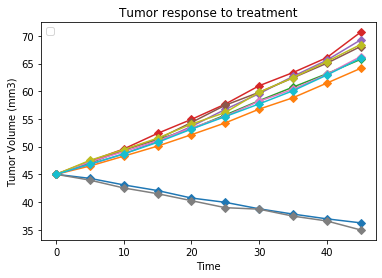

In [51]:
# Generate the Plot (with Error Bars)
import matplotlib.pyplot as plt
plt.title("Tumor response to treatment")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper left")

# Save the Figure
plt.savefig("../Images/lineConfig.png")

# Show the Figure
plt.plot(stderr_df_3.index,stderr_df_3.values, marker="D")


In [52]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_df_met_site = merged_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
grouped_df_met_site_2 = pd.DataFrame(grouped_df_met_site)
# Preview DataFrame
grouped_df_met_site_2.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [53]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
stderr_df_met = merged_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
stderr_df_met_2 = pd.DataFrame(stderr_df_met)
# Preview DataFrame
stderr_df_met_2.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [54]:
# Minor Data Munging to Re-Format the Data Frames
alaki_2 = merged_df[["Drug","Metastatic Sites","Timepoint"]]
stderr_df_met_3 = pd.pivot_table(alaki_2, index='Timepoint', columns = 'Drug',values = 'Metastatic Sites')
# Preview that Reformatting worked
stderr_df_met_3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


No handles with labels found to put in legend.


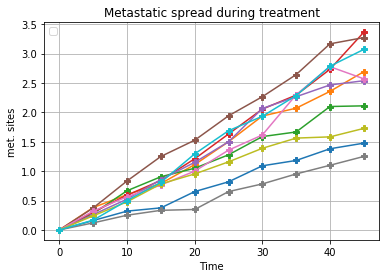

In [55]:
# Generate the Plot (with Error Bars)
plt.title("Metastatic spread during treatment")
plt.xlabel("Time")
plt.ylabel("met. sites")
plt.legend(loc="upper left")
plt.grid()
# Save the Figure
plt.savefig("../Images/lineConfig2.png")
# Show the Figure
plt.plot(stderr_df_met_3.index,stderr_df_met_3.values, marker="P")

In [56]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_df_mice = merged_df.groupby(["Drug","Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
grouped_df_mice_2 = pd.DataFrame(grouped_df_mice)
# Preview DataFrame
grouped_df_mice_2.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [57]:
# Minor Data Munging to Re-Format the Data Frames
#alaki_3 = merged_df[["Drug","Mouse ID","Timepoint"]]
grouped_df_mice_3 = grouped_df_mice_2.reset_index()
stderr_df_mice_3 = grouped_df_mice_3.pivot(index= 'Timepoint', columns ='Drug', values = 'Mouse ID')
# Preview the Data Frame
stderr_df_mice_3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


No handles with labels found to put in legend.


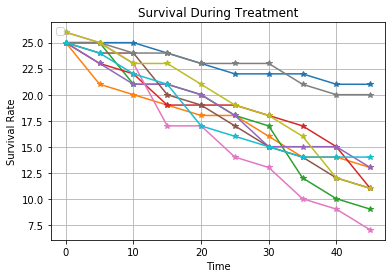

In [58]:
# Generate the Plot (Accounting for percentages)
plt.title("Survival During Treatment")
plt.xlabel("Time")
plt.ylabel("Survival Rate")
plt.legend(loc="upper left")
plt.grid()
# Save the Figure
plt.savefig("../Images/lineConfig3.png")
# Show the Figure
plt.plot(stderr_df_mice_3.index,stderr_df_mice_3.values, marker="*")
#plt.show

In [64]:
# Calculate the percent changes for each drug
stderr_df_4 = stderr_df_3.iloc[[0,9]]
# Display the data to confirm
stderr_df_5 = (stderr_df_4.pct_change())*100

#stderr_df_5 = *1000
stderr_df_5.iloc[1]

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64